# Fit the LBA on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import individual data

In [2]:
# import some example data:
data = rlssm.load_example_dataset(hierarchical_levels = 1)

data.head()

participant  block_label  trial_block  f_cor  f_inc  cor_option  \
0           20            1            1     46     46           4   
1           20            1            2     60     33           4   
2           20            1            3     32     44           2   
3           20            1            4     56     40           4   
4           20            1            5     34     32           2   

   inc_option  times_seen        rt  accuracy  
0           2           1  2.574407         1  
1           2           2  1.952774         1  
2           1           2  2.074999         0  
3           2           3  2.320916         0  
4           1           3  1.471107         1

## Initialize the model

In [3]:
model = rlssm.LBAModel_2A(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
k_priors {'mu': 1, 'sd': 1}
A_priors {'mu': 0.3, 'sd': 1}
tau_priors {'mu': 0, 'sd': 1}


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 200 iterations ended with a divergence (0.0%)
0 of 200 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


### Get rhat

In [6]:
model_fit.rhat

rhat   variable
0  0.996595          k
1  0.996693          A
2  0.995655        tau
3  0.999796  drift_cor
4  1.002850  drift_inc

### Get WAIC

In [7]:
model_fit.waic

{'lppd': -195.9117676732156,
 'p_waic': 3.4080101153548954,
 'waic': 398.639555577141,
 'waic_se': 35.24758887155065}

### Save results

In [8]:
model_fit.to_pickle()

Saving file as: /Users/laurafontanesi/git/rlssm/docs/notebooks/LBA_2A.pkl


## Posteriors

In [9]:
model_fit.samples.describe()

chain        draw    transf_k    transf_A  transf_tau  \
count  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.500000   49.500000    3.072969    1.282488    0.420315   
std      0.501255   28.938507    0.617627    0.545432    0.097345   
min      0.000000    0.000000    1.547620    0.199475    0.193221   
25%      0.000000   24.750000    2.617696    0.853162    0.356208   
50%      0.500000   49.500000    3.097387    1.279160    0.425263   
75%      1.000000   74.250000    3.441474    1.622801    0.477226   
max      1.000000   99.000000    4.636813    2.929345    0.698922   

       transf_drift_cor  transf_drift_inc  
count        200.000000        200.000000  
mean           3.123329          1.517988  
std            0.264801          0.256313  
min            2.546426          0.849490  
25%            2.950180          1.360080  
50%            3.109816          1.517640  
75%            3.265753          1.679263  
max            3.853958          2.140647

In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

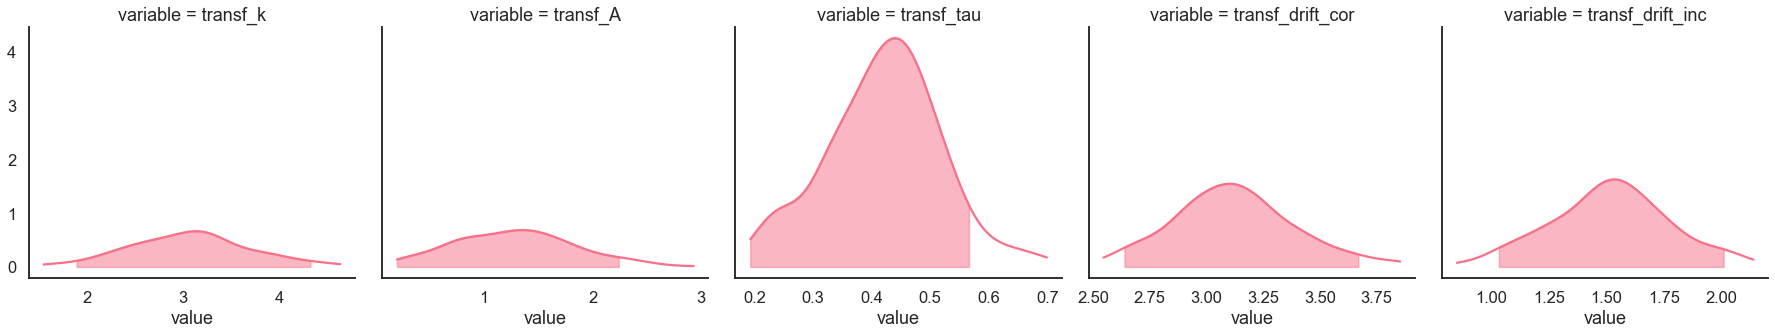

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         2.246846  1.537963  1.249976  2.667635  1.394088  1.185661   
2         1.474279  1.317326  1.281292  1.776970  1.338612  1.595272   
3         1.769881  1.248670  2.000013  2.477428  1.417273  1.537488   
4         1.218720  1.806578  1.491374  1.556123  1.754127  2.173220   
5         1.505410  1.545240  1.263004  1.981529  1.742220  1.447841   
...            ...       ...       ...       ...       ...       ...   
96        2.114076  1.682352  1.292053  1.290883  1.631570  2.536921   
97        1.515118  1.732291  7.900185  1.992388  1.701881  1.195694   
98        1.934512  1.704758  3.664648  2.025907  2.636455  1.388794   
99        1.485397  1.458125  1.561393  1.374246  1.817840  1.899995   
100       1.858069  1.869365  1.464518  1.568417  2.022131  1.332558   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      231  232  233  234   
sample                                            ...                           
1         1.775463  1.299116  2.344744  1.585738  ...      1.0  1.0  1.0  1.0   
2         1.423343  1.411392  1.368143  1.718686  ...      1.0  0.0  1.0  1.0   
3         1.298886  2.047417  1.673906  1.490852  ...      1.0  1.0  1.0  1.0   
4         1.786404  1.423031  1.509262  1.651425  ...      1.0  1.0  1.0  1.0   
5         2.140920  1.298421  1.297520  1.534183  ...      1.0  1.0  1.0  0.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.475092  1.839493  1.549875  1.748721  ...      1.0  1.0  1.0  1.0   
97        1.765124  2.120031  1.681817  1.935664  ...      1.0  0.0  1.0  1.0   
98        1.289439  1.364305  1.641123  1.961389  ...      1.0  1.0  1.0  1.0   
99        2.221972  2.021029  1.958976  1.611125  ...      1.0  1.0  1.0  1.0   
100       1.296797  2.512003  1.955222  3.026658  ...      0.0  1.0  1.0  1.0   

variable                                
trial     235  236  237  238  239  240  
sample                                  
1         0.0  1.0  1.0  1.0  1.0  1.0  
2         0.0  0.0  1.0  1.0  1.0  1.0  
3         0.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         0.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  1.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  0.0  1.0  0.0  
100       1.0  1.0  1.0  1.0  1.0  0.0  

[100 rows x 480 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

mean_accuracy   mean_rt  skewness  quant_10_rt_incorrect  \
sample                                                             
1            0.854167  1.664804  2.165810               1.506785   
2            0.862500  1.682668  3.158625               1.368550   
3            0.850000  1.712393  1.725298               1.613360   
4            0.887500  1.619813  2.537257               1.331044   
5            0.845833  1.768796  2.713919               1.382418   
...               ...       ...       ...                    ...   
96           0.858333  1.679296  2.592582               1.538260   
97           0.887500  1.705270  8.036846               1.314066   
98           0.891667  1.674279  2.983261               1.416547   
99           0.812500  1.740113  3.226386               1.337939   
100          0.904167  1.803922  4.509639               1.383537   

        quant_30_rt_incorrect  quant_50_rt_incorrect  quant_70_rt_incorrect  \
sample                                                                        
1                    1.669890               1.752361               2.038205   
2                    1.540713               1.674629               2.156115   
3                    1.732978               1.990309               2.124092   
4                    1.556282               1.776372               2.082097   
5                    1.583290               1.743878               2.181400   
...                       ...                    ...                    ...   
96                   1.704401               1.905312               2.145374   
97                   1.598821               1.771878               2.127968   
98                   1.601738               1.762865               1.999681   
99                   1.570886               1.752819               2.034753   
100                  1.553577               1.736791               1.890371   

        quant_90_rt_incorrect  quant_10_rt_correct  quant_30_rt_correct  \
sample                                                                    
1                    2.385568             1.221533             1.359931   
2                    2.884746             1.240682             1.375500   
3                    2.672556             1.243860             1.403816   
4                    2.355689             1.149061             1.302143   
5                    2.802916             1.258256             1.455523   
...                       ...                  ...                  ...   
96                   2.677621             1.191991             1.364760   
97                   2.772499             1.191808             1.345362   
98                   2.596806             1.222192             1.372858   
99                   2.808015             1.211335             1.442884   
100                  2.585798             1.243580             1.441850   

        quant_50_rt_correct  quant_70_rt_correct  quant_90_rt_correct  
sample                                                                 
1                  1.511616             1.739581             2.151703  
2                  1.534844             1.744025             2.127136  
3                  1.528488             1.743321             2.166606  
4                  1.471107             1.648440             2.088338  
5                  1.567858             1.793322             2.336169  
...                     ...                  ...                  ...  
96                 1.517171             1.705111             2.255572  
97                 1.502895             1.700021             2.239710  
98                 1.562998             1.767055             2.190829  
99                 1.596091             1.788202             2.252709  
100                1.608690             1.858538             2.475641  

[100 rows x 13 columns]

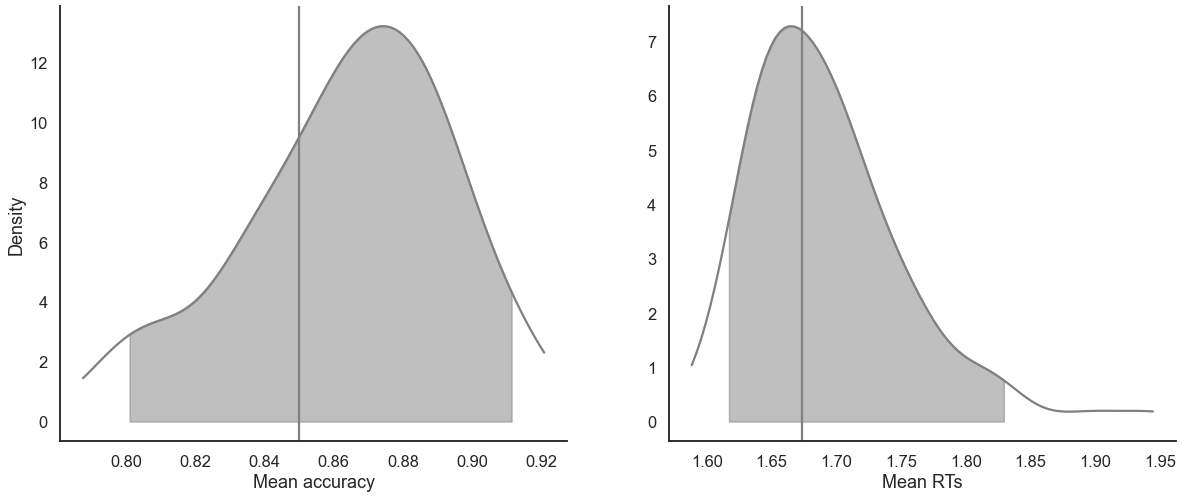

In [14]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

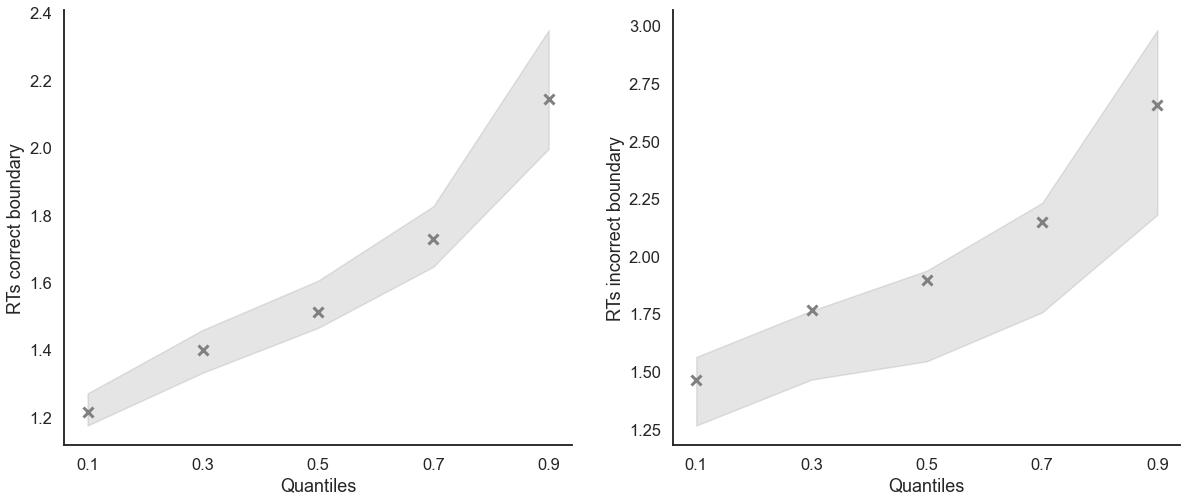

In [15]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [16]:
import numpy as np

In [17]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.760965  2.793220   
                        2                0.75  1.791783  1.563911   
                        3                0.90  1.743365  2.371058   
                        4                0.85  1.801372  2.994665   
                        5                0.90  1.617718  3.355427   
...                                       ...       ...       ...   
3           CD          96               0.85  1.659586 -0.079339   
                        97               0.85  1.524945  1.819670   
                        98               0.90  1.668617  1.254209   
                        99               0.75  1.462542  0.138408   
                        100              0.70  1.609434  0.946274   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    2.273896             1.349401   
                        2                    1.768126             1.315160   
                        3                    2.337256             1.448736   
                        4                    1.981311             1.463829   
                        5                    2.051592             1.385195   
...                                               ...                  ...   
3           CD          96                   1.661425             1.501355   
                        97                   1.528637             1.322557   
                        98                   1.800101             1.443070   
                        99                   1.512019             1.255587   
                        100                  1.566879             1.516307   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    2.481967             1.600919   
                        2                    2.557145             1.426042   
                        3                    2.416226             1.615792   
                        4                    2.114486             1.677760   
                        5                    2.619649             1.455759   
...                                               ...                  ...   
3           CD          96                   1.726938             1.584971   
                        97                   1.713642             1.434720   
                        98                   1.805070             1.491801   
                        99                   1.536708             1.457608   
                        100                  1.694011             1.562540   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    3.183433             1.703819  
                        2                    2.614723             1.619165  
                        3                    2.495196             1.723226  
                        4                    2.126189             1.782304  
                        5                    3.187705             1.580824  
...                                               ...                  ...  
3           CD          96                   1.852454             1.809642  
                        97                   1.860052             1.482929  
                        98                   1.810039             1.667956  
                        99                   1.646303             1.573202  
                        100                  1.858372             1.618214  

[1200 rows x 9 columns]

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.866667  1.725833  1.289234               1.584221   
           2            0.900000  1.752329  1.527601               2.231171   
           3            0.900000  1.686033  0.924488               1.746004   
           4            0.900000  1.732809  1.865226               2.113744   
           5            0.800000  1.635091  2.085413               1.567397   
...                          ...       ...       ...                    ...   
8          96           0.966667  1.735385  4.445814               2.664596   
           97           0.833333  1.693073  0.534953               1.727258   
           98           0.866667  1.791996  0.811008               1.669274   
           99           0.900000  1.738719  1.967172               1.483509   
           100          0.866667  1.796386  1.052592               1.761800   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.460545               1.660907   
           2                  1.498770               2.560241   
           3                  1.332471               1.842445   
           4                  1.246336               2.483196   
           5                  1.324384               1.675482   
...                                ...                    ...   
8          96                 1.356872               2.664596   
           97                 1.334572               1.769807   
           98                 1.466517               1.782816   
           99                 1.408075               1.496928   
           100                1.419787               1.807006   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.644744               1.729153   
           2                  1.612940               2.708332   
           3                  1.544803               1.884541   
           4                  1.450803               2.575727   
           5                  1.518778               1.730329   
...                                ...                    ...   
8          96                 1.475787               2.664596   
           97                 1.583482               1.853036   
           98                 1.642452               1.919534   
           99                 1.619821               2.271276   
           100                1.594746               1.927432   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.791533  
           2                  1.745022  
           3                  1.863387  
           4                  1.597772  
           5                  1.790997  
...                                ...  
8          96                 1.649329  
           97                 1.902496  
           98                 1.949012  
           99                 1.783024  
           100                2.010042  

[800 rows x 9 columns]

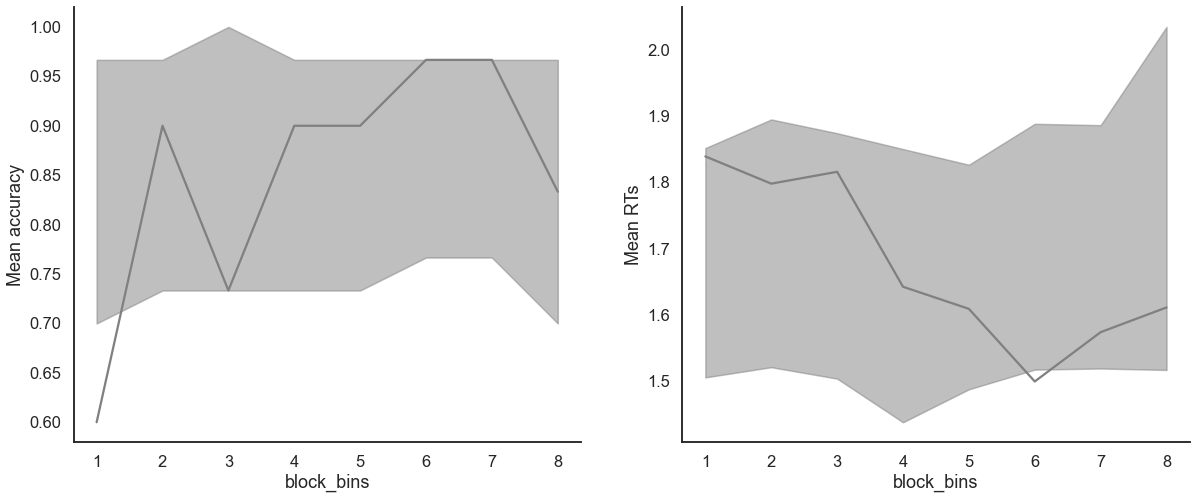

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

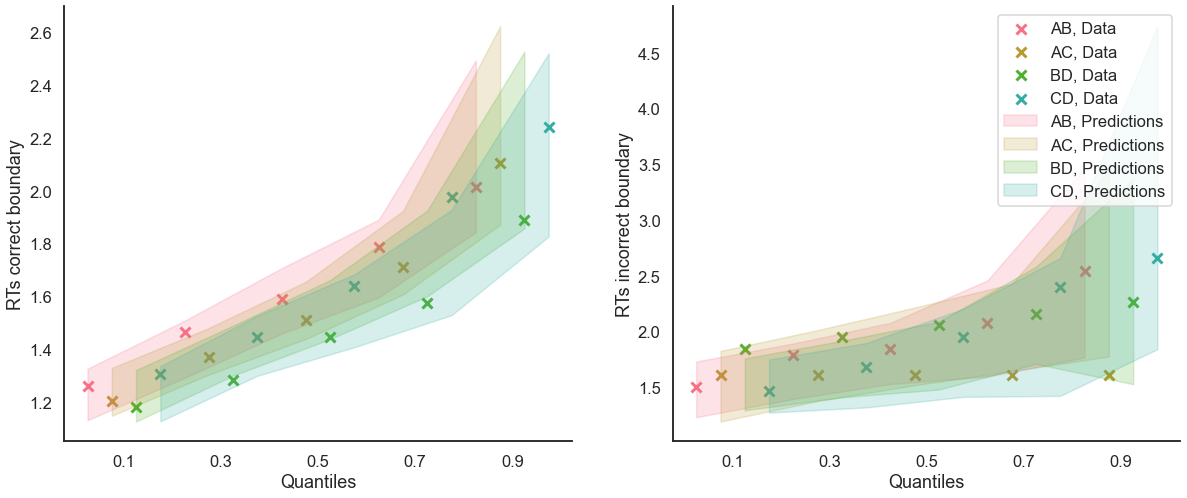

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);